# Dataset Exploration

In [1]:
import math
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "State_of_Iowa_Salary_Book.csv"

In [3]:
def money_to_float(x):
    try:
        if type(x) == float:
            return x
        return float(x.strip('$'))
    except ValueError:
        return float('nan')

def base_salary_to_float(x):
    try:
        if type(x) == float and math.isnan(x):
            return (None, float('nan'))
        elif type(x) == float:
            return (None, x)
        x = x.strip(" ")
        if x == "":
            return (None, float('nan'))
        elif x == "TERMINATED":
            return ("TERMINATED", float('nan'))
        elif x == "Terminated":
            return ("Terminated", float('nan'))
        elif x == "-0-":
            return ("-0-", float('nan'))
        elif x == "ON LEAVE":
            return ("ON LEAVE", float('nan'))
        elif x == "nan":
            return (None, float('nan'))
        elif x == float("nan"):
            return (None, float('nan'))
        else:
            s = x.replace('/', " ").split(' ')
            if len(s) < 2:
                return (None, float(s[0].strip('$').replace(',', "")))
            return (s[1], float(s[0].strip('$').replace(',', "")))
    except:
        # this is to show rows that failed the parsing
        print("<-"+x+"->", type(x))

In [4]:
# read csv
data = pd.read_csv(path, parse_dates=[0,8], converters={'Total Salary Paid': money_to_float, 'Base Salary': base_salary_to_float, 'Travel & Subsistence': money_to_float})
# split Base Salary tuple into two columns
base_salary_parsed = data["Base Salary"].apply(pd.Series).rename(columns={0:'Base Salary Payment Method', 1:'Base Salary Payment Amount'})
data.insert(8, 'Base Salary Payment Method', base_salary_parsed['Base Salary Payment Method'])
data.insert(9, 'Base Salary Payment Amount', base_salary_parsed['Base Salary Payment Amount'])
# delete Base Salary tuple column
data.pop("Base Salary")

<-HR-> <class 'str'>
<-YR-> <class 'str'>
<-20.12HR-> <class 'str'>
<-262.99DA-> <class 'str'>


0               (HR, 31.62)
1         (TERMINATED, nan)
2              (BW, 2212.8)
3              (BW, 1226.4)
4         (TERMINATED, nan)
5         (TERMINATED, nan)
6         (TERMINATED, nan)
7         (TERMINATED, nan)
8              (BW, 2194.4)
9         (TERMINATED, nan)
10        (TERMINATED, nan)
11        (TERMINATED, nan)
12             (BW, 3375.2)
13        (TERMINATED, nan)
14        (TERMINATED, nan)
15             (BW, 3349.6)
16           (YR, 144200.0)
17             (BW, 1237.6)
18             (BW, 2908.8)
19             (BW, 3193.6)
20        (TERMINATED, nan)
21             (BW, 1598.4)
22        (TERMINATED, nan)
23        (TERMINATED, nan)
24        (TERMINATED, nan)
25        (TERMINATED, nan)
26             (BW, 1180.8)
27             (BW, 3087.2)
28             (BW, 1437.6)
29             (BW, 4792.0)
                ...        
665295          (HR, 23.91)
665296        (HR, 25629.0)
665297          (HR, 22.88)
665298    (TERMINATED, nan)
665299          (HR,

In [5]:
data.dtypes

Fiscal Year                   datetime64[ns]
Department                            object
Agency/Institution                    object
Name                                  object
Gender                                object
Place of Residence                    object
Position                              object
Base Salary Payment Method            object
Base Salary Payment Amount           float64
Base Salary Date              datetime64[ns]
Total Salary Paid                    float64
Travel & Subsistence                 float64
dtype: object

In [6]:
data

,Fiscal Year,Department,Agency/Institution,Name,Gender,Place of Residence,Position,Base Salary Payment Method,Base Salary Payment Amount,Base Salary Date,Total Salary Paid,Travel & Subsistence
0,2007-01-01,"Administrative Services, Department of",NaN,ABELS BEVERLY J,F,POLK,ADVANCED PERSONNEL MGMT,HR,31.62,2007-07-01,6462.34,NaN
1,2007-01-01,"Administrative Services, Department of",NaN,ABRAMS JERRY A,M,WAPELLO,EARLY OUT POSITION,TERMINATED,NaN,2007-07-01,4242.82,NaN
2,2007-01-01,"Administrative Services, Department of",NaN,ADAMS CAROL L,F,MITCHELL,ADVANCED PERSONNEL MGMT,BW,2212.80,2007-07-01,55065.60,924.44
3,2007-01-01,"Administrative Services, Department of",NaN,ADAMS JEANNIE R,F,POLK,ACCOUNTING TECHNICIAN 2,BW,1226.40,2007-07-01,30800.83,6.80
4,2007-01-01,"Administrative Services, Department of",NaN,ADAMS NED J,M,POLK,EARLY OUT POSITION,TERMINATED,NaN,2007-07-01,10634.33,NaN
5,2007-01-01,"Administrative Services, Department of",NaN,ADAMSON DAVID A,M,POLK,CONSTRUCTION/DESIGN ENGN,TERMINATED,NaN,2007-07-01,77647.67,364.22
6,2007-01-01,"Administrative Services, Department of",NaN,ALLEN DANIEL S,M,POLK,CUSTODIAL WORKER,TERMINATED,NaN,2007-07-01,10520.28,7.48
7,2007-01-01,"Administrative Services, Department of",NaN,ALLEN ROSALIE R,F,CHEROKEE,EARLY OUT POSITION,TERMINATED,NaN,2007-07-01,2588.47,NaN
8,2007-01-01,"Administrative Services, Department of",NaN,ALLEN SANDRA L,F,POLK,INFO TECH SPECIALIST 2,BW,2194.40,2007-07-01,56205.58,65.28
9,2007-01-01,"Administrative Services, Department of",NaN,ALLERHEILIGEN RICHARD D,M,NaN,EARLY OUT POSITION,TERMINATED,NaN,2007-07-01,1522.67,NaN


In [7]:
print("Number of unique elements per column")
for k in ["Fiscal Year", "Department", "Agency/Institution", "Gender", "Place of Residence", "Position", "Base Salary Payment Method"]:
    c = data[k].unique()
    print(k, ":", len(c))

Number of unique elements per column
Fiscal Year : 11
Department : 53
Agency/Institution : 37
Gender : 7
Place of Residence : 1426
Position : 5699
Base Salary Payment Method : 16


In [8]:
for k in ["Fiscal Year", "Department", "Agency/Institution", "Gender", "Place of Residence", "Position", "Base Salary Payment Method"]:
    c = data[k].value_counts()
    print(str(k)+":\n"+str(c)+"\n\n")

Fiscal Year:
2007-01-01    67695
2009-01-01    60328
2008-01-01    60262
2015-01-01    60138
2011-01-01    60125
2012-01-01    59929
2014-01-01    59859
2013-01-01    59488
2017-01-01    59400
2010-01-01    59113
2016-01-01    58988
Name: Fiscal Year, dtype: int64


Department:
University of Iowa                                     235607
Iowa State University                                  112766
Human Services, Department of                           65299
Transportation, Department of                           38510
Corrections, Department of                              35940
University of Northern Iowa                             30175
Judicial Branch                                         21971
Natural Resources, Department of                        17388
Public Safety, Department of                            10917
Iowa Veterans Home                                       9950
Iowa Workforce Development                               9891
Education, Department of               

## End of initial data munging

## Start basic visualization

In [9]:
# for 600000 rows this shows a preview of values around 100000 and 500000
data.sort_values(["Total Salary Paid"]).iloc[100000:500000]

,Fiscal Year,Department,Agency/Institution,Name,Gender,Place of Residence,Position,Base Salary Payment Method,Base Salary Payment Amount,Base Salary Date,Total Salary Paid,Travel & Subsistence
497448,2015-01-01,"Human Services, Department of",Human Services Administration,SCHAFERSMAN CAROLE S,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2015-07-01,8236.80,0.00
318469,2012-01-01,"Human Services, Department of",Human Services Administration,SCHAFERSMAN CAROLE S,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2012-07-01,8236.80,0.00
494064,2015-01-01,"Human Services, Department of",Human Services Administration,DAVIS KATHIE L,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2015-07-01,8236.80,0.00
376688,2013-01-01,"Human Services, Department of",Human Services Administration,LEWIS JOYCE E,F,WEBSTER,SERIP RETIREE,TERMINATED,NaN,2013-07-01,8236.80,0.00
255056,2011-01-01,"Human Services, Department of",Human Services Administration,DAVIS KATHIE L,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2011-07-01,8236.80,0.00
314459,2012-01-01,"Human Services, Department of",Human Services Administration,CARNAHAN JAMES M,M,SCOTT,SERIP RETIREE,TERMINATED,NaN,2012-07-01,8236.80,0.00
433938,2014-01-01,"Human Services, Department of",Human Services Administration,CARNAHAN JAMES M,M,SCOTT,SERIP RETIREE,TERMINATED,NaN,2014-07-01,8236.80,0.00
437726,2014-01-01,"Human Services, Department of",Human Services Administration,SCHAFERSMAN CAROLE S,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2014-07-01,8236.80,0.00
259675,2011-01-01,"Human Services, Department of",Human Services Administration,WALSH NANCY A,F,NaN,SERIP RETIREE,TERMINATED,NaN,2011-07-01,8236.80,0.00
378207,2013-01-01,"Human Services, Department of",Human Services Administration,SCHAFERSMAN CAROLE S,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2013-07-01,8236.80,0.00


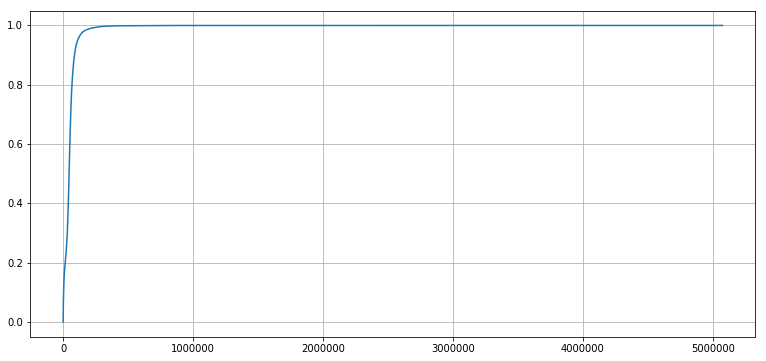

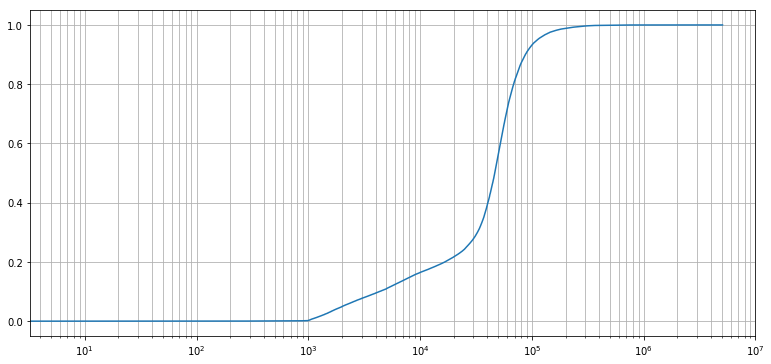

In [10]:
# cdf with linear scale
l = len(data["Total Salary Paid"])
plt.figure(figsize=(13, 6))
plt.grid(True, which="both")
p = plt.plot(data["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum().iloc[2:]) # the array slicing gets ride of negative salary
plt.show()

# cdf with x-axis log scale
plt.figure(figsize=(13, 6))
plt.grid(True, which="both")
p = plt.plot(data["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum().iloc[2:]) # the array slicing gets ride of negative salary
plt.semilogx(True)
plt.show()

# this shows that 90% of the rows have total salaries that are less then $10,000